# Model Evaluation Metrics

## Model Testing

Always verify your model using **test data**.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = np.asarray(pd.read_csv('data/testing-data.csv', header=None))
X = data[:,0:2]
y = data[:,2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = model.score(X_test, y_test)

acc

0.9583333333333334

## Confusion Matrix

How good is our model?

* **Spam**: we don't want **False Positives** but **False Negatives** are Ok, i.e. we want a high **Precision**.
* **Sickness**: we don't want **False Negatives** but **False Positives** are Ok, i.e. we want a high **Recall**.

### Type 1 and Type 2 Errors

Sometimes in the literature, you'll see False Positives and False Negatives as **Type 1** and **Type 2 errors**. 

* **Type 1 Error** (Error of the first kind, or False Positive): In the medical example, this is when we misdiagnose a healthy patient as sick.
* **Type 2 Error** (Error of the second kind, or False Negative): In the medical example, this is when we misdiagnose a sick patient as healthy.

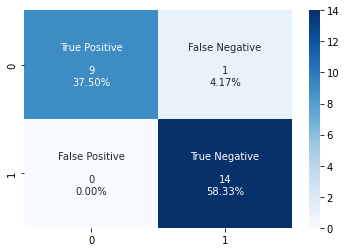

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues');

In [102]:
from sklearn.metrics import confusion_matrix

# positive = 1, negative = 0
predicted = [0, 0, 1, 1, 0, 1, 0 ,1, 1, 0]      # y_pred
actual    = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]      # y_true

confusion_matrix(actual, predicted)

array([[3, 1],
       [2, 4]])

## Accuracy

Out of all the observations, **how many** did we classify **correctly**?

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FN} + \text{FP} + \text{TN}}
$$

In [41]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'Accuracy = {acc:.2}')

Accuracy = 0.96


In [144]:
# positive = 1, negative = 0
predicted = [0, 0, 1, 1, 0, 1, 0 ,1, 1, 0]      # y_pred
actual    = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]      # y_true

tp = 4
tn = 3
fn = 2
fp = 1

accuracy = (tp + tn) / (tp + fn + fp + tn)

print(f'Accuracy = {accuracy_score(actual, predicted):.2}')

print(f'Accuracy = {accuracy:.2}')

Accuracy = 0.7
Accuracy = 0.7


### Accuracy Paradox

If we have **imbalanced classes**, then we do **not** want to use **accuracy**.

Supposed a population of **10000 people** and **1 is actually sick**. A medical test results in the following **confusion matrix**:

In [156]:
arr = np.array([['is sick', 'is sick', 1], ['is sick', 'not sick', 0], ['not sick', 'is sick', 49], ['not sick', 'not sick', 9950]])
df = pd.DataFrame(arr, columns=['actual', 'predicted', 'count'])
med_test = df.pivot('actual', 'predicted', 'count')
med_test

predicted,is sick,not sick
actual,,
is sick,1,0
not sick,49,9950


In [157]:
tp = int(med_test['is sick']['is sick'])
tn = int(med_test['not sick']['not sick'])
fp = int(med_test['is sick']['not sick'])
fn = int(med_test['not sick']['is sick'])

accuracy = (tp + tn) / (tp + fn + fp + tn)

print(f'Accuracy = {accuracy:.3}')

Accuracy = 0.995


Even though we have a **99,5%** accuracy, **49 out of 50** positive **predictions are incorrect**.

In [160]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print(f'Precision = {precision:.2}')
print(f'Recall = {recall:.2}')
print(f'F1 = {f1:.2}')

Precision = 0.02
Recall = 1.0
F1 = 0.039


The **precission** of **2%** revelas this **poor performance**.

## Precision

Precision answeres the following questions:

* Out of the points we've predicted to be positive, how many are correct?
* How many retrieved items are relevant?

Examples:

* Out of the patients we **diagnosed** with an illness, how many did we classify correctly as **sick**? $\implies$ Precision can be **low**!
* Out of all the **emails** sent to the **spam folder**, how many were actually **spam**? $\implies$ Precision should be **high**!

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{True Positive}}{\text{Predicted Positive}}
$$

In [60]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

print(f'Precision = {precision:.2}')

Precision = 0.93


In [100]:
# positive = 1, negative = 0
predicted = [0, 0, 1, 1, 0, 1, 0 ,1, 1, 0]      # y_pred
actual    = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]      # y_tcrue

print(f'Precision = {precision_score(actual, predicted):.2}')



tp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==1)))
fp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==0)))

precision = tp / (tp + fp)

print(f'Precision = {precision:.2}')



tp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==1)))
pp  = np.sum((np.array(predicted)==1))   # predicted positive

precision = tp / pp

print(f'Precision = {precision:.2}')

Precision = 0.8
Precision = 0.8
Precision = 0.8


In the field of **information retrieval**, precision is the fraction of **retrieved documents** that are **relevant to the query**:

$$
\text{Precision} = \frac {\text{Relevant Documents} \cap \text{Retrieved Documents}}{\text{Retrieved Documents}}
$$

For example, for a text search on a set of documents, **precision** is the number of **correct results** divided by the number of **all returned** results.

### Use Case

Use **precision** when we identify something as positive, we want to be sure it is truly positive.

## Recall / Sensitivity / True Positive Rate

Recall does answer the following questions:

* Out of the points they are labeled positive, how many of them are predicted correctly as positive?
* How many relevant items are retieved?

Example:

* Out of the **sick patients**, how many did we **correctly diagnose** as sick? $\implies$ Recall should be **high**!
* From all the **spam emails**, how many were **correctly** sent to the **spam folder**? $\implies$ Recall can be **low**!

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{\text{True Positive}}{\text{Actual Positive}}
$$

In [93]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

print(f'Recall = {recall:.2}')

Recall = 1.0


In [152]:
# positive = 1, negative = 0
predicted = [0, 0, 1, 1, 0, 1, 0 ,1, 1, 0]      # y_pred
actual    = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]      # y_tcrue

print(f'Recall = {recall_score(actual, predicted):.2}')


tp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==1)))
fn = len(np.intersect1d(np.where(np.array(predicted)==0), np.where(np.array(actual)==1)))

recall = tp / (tp + fn)

print(f'Recall = {recall:.2}')


tp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==1)))
ap  = np.sum((np.array(actual)==1))    # actual positive

recall = tp / ap

print(f'Recall = {recall:.2}')

Recall = 0.67
Recall = 0.67
Recall = 0.67


In **information retrieval**, recall is the fraction of the **relevant documents** that are **successfully retrieved**.

$$
\text{Recall} = \frac {\text{Relevant Documents} \cap \text{Retrieved Documents}}{\text{Relevant Documents}}
$$

In **binary classification**, recall is called **sensitivity**. It can be viewed as the probability that a relevant document is retrieved by the query.

It is **trivial** to achieve recall of **100%** by returning all documents in response to any query. Therefore, **recall alone is not enough**. One needs to measure the number of non-relevant documents also, for example by also computing the precision.

### Use Case

Use **recall** if we really want to make sure the positive cases are all caught even if that means we identify some negatives as positives.

## Specificity / True Negative Rate

Specificity tells us what proportion of the negative class got correctly classified.

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

Taking the same example as in Sensitivity, Specificity would mean determining the proportion of healthy people who were correctly identified by the model.

## $\text{F}_1$ Score

The $\text{F}_1$ Score combines **precision** $P$ and **recall** $R$ using the **harmonic mean**:

$$
\begin{align}
\text{F}_1 &= 2 \cdot \frac{\text{P} \cdot \text{R}}{\text{P} + \text{R}} \\[8pt]
&= \frac{2}{\frac{1}{P} + \frac{1}{R}}
\end{align}
$$

The $F_1$ Score **wights** the **precision** $P$ and the **recall** $R$ the **same**.

In [95]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

print(f'F1 = {f1:.2}')

F1 = 0.97


In [101]:
# positive = 1, negative = 0
predicted = [0, 0, 1, 1, 0, 1, 0 ,1, 1, 0]      # y_pred
actual    = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]      # y_tcrue

print(f'F1 = {f1_score(actual, predicted):.2}')

tp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==1)))
fp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==0)))
p = tp / (tp + fp)

tp = len(np.intersect1d(np.where(np.array(predicted)==1), np.where(np.array(actual)==1)))
fn = len(np.intersect1d(np.where(np.array(predicted)==0), np.where(np.array(actual)==1)))
r = tp / (tp + fn)


f1 = 2 * p * r / (p + r)

print(f'F1 = {f1:.2}')

F1 = 0.73
F1 = 0.73


### Use Case

Use **F1-Score** if we care equally about identifying positive and negative cases

## $\text{F}_\beta$ Score

The $\text{F}_\beta$ Score allows to have different weights on **precision** $P$ and **recall** $R$.

For positive values of $\beta$, the $\text{F}_\beta$ Score is:

$$
\text{F}_\beta = (1 + \beta^2) \cdot \frac{\text{P} \cdot \text{R}}{\beta^2 \cdot \text{P} + \text{R}}
$$

For example, $\text{F}_2$ weights the **recall** 4 times as high as the **precision**. 

Whereas $\text{F}_{0.5}$ weights **precision** 4 times as high as **recall**.

### Use Cases

Use F1-Score if we care equally about identifying positive and negative cases

If you decide that you care more about precision, you should move beta closer to 0. If you decide you care more about recall, you should move beta towards infinity.

### Examples

Given the following three models, which one should have an $\text{F}_\beta$ score of $2$, $1$, and $0.5$?:

1. Detecting malfunctioning parts in a spaceship: For the spaceship model, we can't really afford any malfunctioning parts, and it's ok if we overcheck some of the parts that are working well. Therefore, this is a high recall model, so we associate it with $\beta = 2$.

2. Sending phone notifications about videos a user may like: For the notifications model, since it's free to send them, we won't get harmed too much if we send them to more people than we need to. But we also shouldn't overdo it, since it will annoy the users. We also would like to find as many interested users as we can. Thus, this is a model which should have a decent precision and a decent recall. $\beta = 1$ should work here.

3. Sending promotional material in the mail to potential clients: For the Promotional Material model, since it costs us to send the material, we really don't want to send it to many people that won't be interested. Thus, this is a high precision model. Thus, $\beta = 0.5$. will work here.

### Boundaries in the F-beta score

If we set $\beta = 0$, we get

$$
\text{F}_0 = (1 + 0^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{0 \cdot \text{Precision} + \text{Recall}} = \frac{\text{Precision} \cdot \text{Recall}}{\text{Recall}} = \text{Precision}
$$

Therefore, the **minimum value** of $\beta$ is zero, and at this value, we get the **precision**.

If $N$ is very large, then

$$
\text{F}_\beta = (1 + N^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{N^2 \cdot \text{Precision} + \text{Recall}} = \frac{\text{Precision} \cdot \text{Recall}}{\frac{N^2}{1+N^2}\text{Precision} + \frac{1}{1+N^2}\text{Recall}}
$$

If $N$ goes to **infinity**, we can see that $\frac{1}{1+N^2}$ goes to $0$, and $\frac{N^2}{1+N^2}$ goes to $1$.

Therefore, if we take the limit, we have

$$
{\lim_{N\rightarrow \infty}} \text{F}_N = \frac{\text{Precision} \cdot \text{Recall}}{1 \cdot \text{Precision} + 0 \cdot \text{Recall}} = \text{Recall}
$$

Thus, to conclude, the **boundaries** of beta are between $0$ and $\infty$.

* If $\beta = 0$, then we get **precision**.
* If $\beta = \infty$, then we get **recall**.
* For other values of $\beta$, if they are close to $0$, we get something **close to precision**, if they are **large** numbers, then we get something **close to recall**, and if $\beta = 1$, then we get the **harmonic mean of precision and recall**.

## Receiver Operating Characteristic (ROC)

The ROC curve is an **evaluation metric** for **binary classification** problems. It is a probability curve that plots the **TPR** (y-axis) against **FPR** (x-axis) at various **threshold values** and essentially separates the **'signal'** from the **'noise'**. 

### Area Under the Curve (AUC)

The AUC is the measure of the **ability** of a classifier to **distinguish between classes** and is used as a summary of the ROC curve. 

* When $\text{AUC} = 1$, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. 

* When $0.5 < \text{AUC} < 1$, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

* When $\text{AUC} = 0.5$, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

* If $\text{AUC} = 0$, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

### Purposes of ROC Curve

The ROC curve serves **two purposes**:

1. **Compare models**: We can compare models by displaying their ROC curves. Then you can choose which model performs best. To choose it, it is necessary to caclulate the area under the curve: **The larger the AUC, the better our model**.

2. **Choose an optimal threshold**: The ideal threshold is the **best compromise** between **sensitivity** and **specificity**. The ideal threshold corresponds to the **point** both **closest to the ideal** and at the same time **farthest from the diagonal**.

### Example

We create arbitrary data using the `make_classification` method:

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

will test the performance of two classifiers on this dataset:

In [44]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()

# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

We use the method `roc_curve()` to computes the **ROC** for your classifier! It returns the **FPR**, **TPR**, and **threshold** values:

In [45]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

The **AUC score** can be computed using the `roc_auc_score()` method:

In [46]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


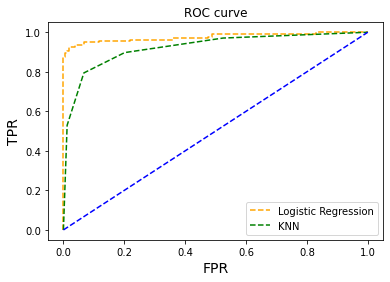

In [47]:
import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve', fontsize=12)
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.legend();